In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [16]:
np.random.seed(42)

In [17]:
tiger_tail_length = np.random.normal(loc=8, scale=1, size=100)
tiger_body_size = np.random.normal(loc=5, scale=1, size=100)

In [18]:
lion_tail_length = np.random.normal(loc=5, scale=1, size=100)
lion_body_size = np.random.normal(loc=8, scale=1, size=100)

In [19]:
tigers_data = np.vstack((tiger_tail_length, tiger_body_size)).T
lions_data = np.vstack((lion_tail_length, lion_body_size)).T
data = np.vstack((tigers_data, lions_data))
labels = np.hstack((np.zeros(len(tigers_data)), np.ones(len(lions_data))))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

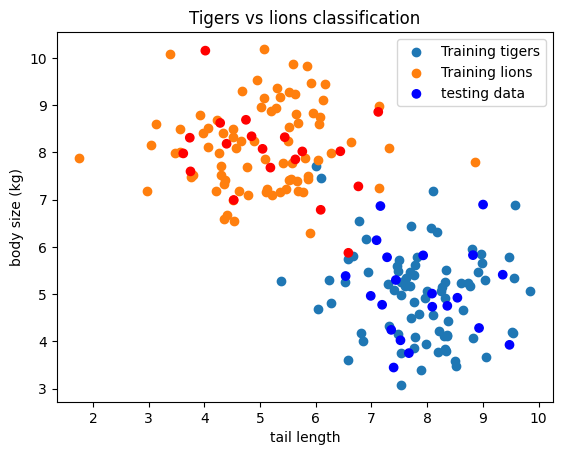

In [21]:
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training tigers')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training lions')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label='testing data')
plt.xlabel('tail length')
plt.ylabel('body size (kg)')
plt.title('Tigers vs lions classification')
plt.legend()
plt.show()


In [22]:
def random_linear_classifier(data_tigers, data_lions, k, d):
    lowest_error = float('inf')
    accurate_theta = None
    accurate_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

    error = compute_error(data_tigers, data_lions, theta, theta0)

    if error < lowest_error:
        lowest_error = error
        accurate_theta = theta
        accurate_theta0 = theta0

    return accurate_theta, accurate_theta0, lowest_error


def compute_error(data_tigers, data_lions, theta, theta0):
    error = 0
    for x_tiger in data_tigers:
        if np.dot(theta, x_tiger) + theta0 <= 0:
            error += 1
    for x_lion in data_lions:
        if np.dot(theta, x_lion) + theta0 > 0:
            error += 1

    return error

In [23]:
# define function for kfold cross validation
def cross_validate(data_tigers, data_lions, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_tigers):
            x_train_fold = np.vstack((data_tigers[train_index], data_lions[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            x_val_fold = np.vstack((data_tigers[val_index], data_lions[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            accurate_theta_fold, accurate_theta0_fold, error = random_linear_classifier(x_train_fold[y_train_fold == 0], x_train_fold[y_train_fold == 1], k, d)

            errors.append(compute_error(x_val_fold[y_val_fold == 0], x_val_fold[y_val_fold == 1], accurate_theta_fold, accurate_theta0_fold))

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# define k values to try
k_values = [1, 100, 500, 1000, 5000]

best_k = cross_validate(tigers_data, lions_data, k_values, d=2)

print(f"Best value of k:  {best_k}")


Best value of k:  1000


In [24]:
# running the algolrithm
k = best_k
d = 2
accurate_theta_train, accurate_theta0_train, training_error = random_linear_classifier(x_train[y_train == 0], x_train[y_train == 1 ], k, d)

In [25]:
# calculating how to get the decision boundary
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = y_vals = (-accurate_theta_train[0] + x_vals_train - accurate_theta0_train) / accurate_theta_train[1]

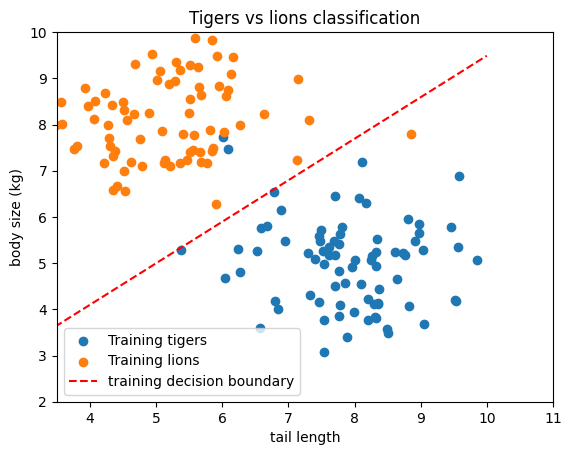

In [26]:
# plotting the decision boundary
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training tigers')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training lions')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='training decision boundary')
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('tail length')
plt.ylabel('body size (kg)')
plt.title('Tigers vs lions classification')
plt.legend()
plt.show()


In [27]:
print(f"Training error:  {training_error}")

Training error:  81


In [28]:
test_error = compute_error(x_test[y_test == 0], x_test[y_test == 1], accurate_theta_train, accurate_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 19
